In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastcore import *
from pathlib2 import Path
import json
import pandas as pd
import coco_text
import skimage.io as io
import pylab
import numpy as np
import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
Path().absolute()

PosixPath('/home/fredrikmathisen/Documents/text_detection')

In [66]:
#path_coco = Path('/home/paperspace/data/coco')
path_coco = Path('/home/fredrikmathisen/Documents/Data/coco')

In [67]:
#Paperspace path
#img_dir = Path('/home/paperspace/data/coco/images/train2014/')
#annotations = Path('/home/paperspace/data/coco/annotations/COCO_Text.json')

#Local path mmiv
img_dir = path_coco/'images/train2014/'
annotations = path_coco/'annotations/COCO_Text.json'


In [6]:
annotations

PosixPath('/home/fredrikmathisen/Documents/Data/coco/annotations/COCO_Text.json')

In [7]:
ct_anno = coco_text.COCO_Text(annotations)

loading annotations into memory...
0:00:01.751324
creating index...
index created!


In [8]:
ct_anno.info()

url: http://vision.cornell.edu/se3/coco-text/
date_created: 2017-03-28
version: 1.4
description: This is 1.4 version of the 2017 COCO-Text dataset.
author: COCO-Text group


In [9]:
imgs = ct_anno.getImgIds(imgIds=ct_anno.train, catIds=[('legibility','legible'),('class','machine printed')])

In [10]:
anns = ct_anno.getAnnIds(imgIds=ct_anno.train, 
                        catIds=[('legibility','legible'),('class','machine printed')])

In [11]:
# get all images containing at least one instance of legible text
imgIds = ct_anno.getImgIds(imgIds=ct_anno.train, catIds=[('legibility','legible')])
# pick one at random
img = ct_anno.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

/home/fredrikmathisen/Documents/Data/coco/images/train2014/COCO_train2014_000000255203.jpg


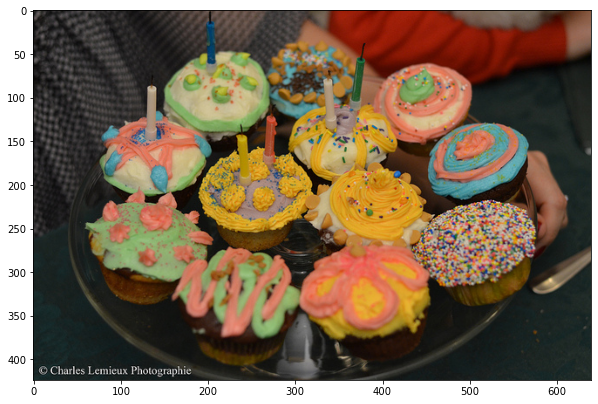

In [12]:
dataType = 'train2014'


I = io.imread('%s/images/%s/%s'%(path_coco,dataType,img['file_name']))
print('%s/images/%s/%s'%(path_coco,dataType,img['file_name']))
plt.figure()
plt.imshow(I)

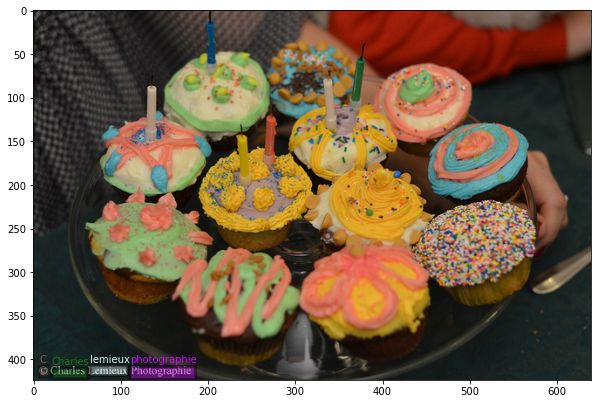

In [13]:
plt.imshow(I)
annIds = ct_anno.getAnnIds(imgIds=img['id'])
anns = ct_anno.loadAnns(annIds)
ct_anno.showAnns(anns)

In [14]:
img

{'width': 640,
 'file_name': 'COCO_train2014_000000255203.jpg',
 'set': 'train',
 'id': 255203,
 'height': 424}

In [15]:
anns

[{'polygon': [6.577181208053692,
   407.8987341772152,
   17.315436241610737,
   407.8987341772152,
   17.315436241610737,
   418.6329113924051,
   6.577181208053692,
   418.6329113924051],
  'language': 'english',
  'area': 115.26633251210613,
  'id': 1127778,
  'utf8_string': 'C',
  'image_id': 255203,
  'bbox': [6.577181208053692,
   407.8987341772152,
   10.738255033557046,
   10.734177215189884],
  'legibility': 'legible',
  'class': 'machine printed'},
 {'polygon': [20.536912751677853,
   410.0455696202532,
   61.34228187919464,
   410.0455696202532,
   61.34228187919464,
   421.85316455696204,
   20.536912751677853,
   421.85316455696204],
  'language': 'english',
  'area': 481.81326990060194,
  'id': 1127779,
  'utf8_string': 'Charles',
  'image_id': 255203,
  'bbox': [20.536912751677853,
   410.0455696202532,
   40.805369127516784,
   11.80759493670883],
  'legibility': 'legible',
  'class': 'machine printed'},
 {'polygon': [110.43458938598633,
   407.842453956604,
   185.0517

In [16]:
train_imgs = ct_anno.loadImgs(ct_anno.train)

In [17]:
len(train_imgs)

43686

In [18]:
train_imgs[0]

{'width': 612,
 'file_name': 'COCO_train2014_000000378466.jpg',
 'set': 'train',
 'id': 378466,
 'height': 612}

In [19]:
train_anno_ids = ct_anno.getAnnIds(ct_anno.train)

In [20]:
len(train_anno_ids)

118309

In [21]:
type(train_anno_ids[0])

int

In [22]:
train_annos = ct_anno.loadAnns(train_anno_ids)

In [23]:
len(train_annos)

118309

In [24]:
train_annos[0]['bbox']

[212.35294117647058,
 108.67088607594941,
 25.815126050420183,
 17.215189873417717]

In [25]:
from fastai.vision.all import *

In [26]:
img_names = get_image_files(img_dir)

In [27]:
def get_annotations_text(fname, prefix=None):
    "Open a COCO style json in `fname` and returns the lists of filenames (with maybe `prefix`) and labelled bboxes."
    annot_dict = json.load(open(fname))
    id2images, id2bboxes = {}, collections.defaultdict(list),
    #classes = {o['id']:o['name'] for o in annot_dict['cats']}
    for o in annot_dict['anns'].keys():
        anns = annot_dict['anns'][o]
        bb = anns['bbox']
        id2bboxes[anns['image_id']].append([bb[0],bb[1], bb[0]+bb[2], bb[1]+bb[3]])
    #id2cats[o['image_id']].append(classes[o['category_id']])
    id_image_list = []
    fnames = []
    for o in annot_dict['imgs'].keys():
        imgs = annot_dict['imgs'][o]
        id2images = {imgs['id']:ifnone(prefix, '') + imgs['file_name'] for img in annot_dict['imgs'].keys() if imgs['id'] in id2bboxes}
        
        if id2images: id_image_list.append(id2images), fnames.append(imgs['file_name'])
    return id_image_list, id2bboxes, fnames
    

In [62]:
test_images, test_lbl_bbox, fnames = get_annotations_text(annotations)

In [29]:
len(test_images)

26847

In [46]:
test_images[0]

KeyError: '287140'

In [31]:
len(test_lbl_bbox)

26847

In [32]:
test_images

[{287140: 'COCO_train2014_000000287140.jpg'},
 {370258: 'COCO_train2014_000000370258.jpg'},
 {36606: 'COCO_train2014_000000036606.jpg'},
 {286892: 'COCO_train2014_000000286892.jpg'},
 {286897: 'COCO_train2014_000000286897.jpg'},
 {19397: 'COCO_train2014_000000019397.jpg'},
 {281774: 'COCO_train2014_000000281774.jpg'},
 {182728: 'COCO_train2014_000000182728.jpg'},
 {479864: 'COCO_train2014_000000479864.jpg'},
 {120120: 'COCO_train2014_000000120120.jpg'},
 {215304: 'COCO_train2014_000000215304.jpg'},
 {498601: 'COCO_train2014_000000498601.jpg'},
 {120127: 'COCO_train2014_000000120127.jpg'},
 {359106: 'COCO_train2014_000000359106.jpg'},
 {58143: 'COCO_train2014_000000058143.jpg'},
 {413923: 'COCO_train2014_000000413923.jpg'},
 {413927: 'COCO_train2014_000000413927.jpg'},
 {458339: 'COCO_train2014_000000458339.jpg'},
 {311174: 'COCO_train2014_000000311174.jpg'},
 {88398: 'COCO_train2014_000000088398.jpg'},
 {311173: 'COCO_train2014_000000311173.jpg'},
 {527748: 'COCO_train2014_000000527748

In [33]:
test_lbl_bbox

defaultdict(list,
            {10581: [[380.57979575247066,
               581.7662670169573,
               415.1992437528803,
               610.5664198710294],
              [392.7038412094116,
               55.81083655357361,
               413.9738931655884,
               62.92053246498108],
              [371.4147456028465,
               572.3458411748494,
               413.403003420591,
               606.4383385126506],
              [379.8077564467068,
               55.29220921901123,
               393.45161323527395,
               60.4868020062097],
              [343.9816292664045,
               55.02807738237401,
               379.36763203417235,
               60.83897778839264],
              [346.87852724257345, 17, 381.99741766934727, 27.42441684223501],
              [33.242266949152544,
               513.620253164557,
               57.54735169491526,
               558.9873417721519],
              [55.351165771484375,
               544.2091827392578,
    

In [70]:
#fnames = ct_anno.loadImgs(test_lbl_bbox)
labels = path_coco/'annotations/COCO_Text.json'
f_names = get_image_files(img_dir)

In [49]:
type(fnames)

NoneType

In [52]:
path_coco = str(path_coco)

In [71]:
dls = ImageDataLoaders.from_lists(str(img_dir), f_names, str(labels), bs=16, item_tfms=resize_images())

In [72]:
learn = cnn_learner(dls, xresnet34, loss_func=CrossEntropyLossFlat)

In [73]:
learn.lr_find()

RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/fredrikmathisen/anaconda3/envs/fastai/lib/python3.8/site-packages/torch/utils/data/_utils/worker.py", line 185, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/fredrikmathisen/anaconda3/envs/fastai/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 34, in fetch
    data = next(self.dataset_iter)
  File "/home/fredrikmathisen/anaconda3/envs/fastai/lib/python3.8/site-packages/fastai/data/load.py", line 111, in create_batches
    yield from map(self.do_batch, self.chunkify(res))
  File "/home/fredrikmathisen/anaconda3/envs/fastai/lib/python3.8/site-packages/fastai/data/load.py", line 132, in do_batch
    def do_batch(self, b): return self.retain(self.create_batch(self.before_batch(b)), b)
  File "/home/fredrikmathisen/anaconda3/envs/fastai/lib/python3.8/site-packages/fastai/data/load.py", line 131, in create_batch
    def create_batch(self, b): return (fa_collate,fa_convert)[self.prebatched](b)
  File "/home/fredrikmathisen/anaconda3/envs/fastai/lib/python3.8/site-packages/fastai/data/load.py", line 48, in fa_collate
    else type(t[0])([fa_collate(s) for s in zip(*t)]) if isinstance(b, Sequence)
  File "/home/fredrikmathisen/anaconda3/envs/fastai/lib/python3.8/site-packages/fastai/data/load.py", line 48, in <listcomp>
    else type(t[0])([fa_collate(s) for s in zip(*t)]) if isinstance(b, Sequence)
  File "/home/fredrikmathisen/anaconda3/envs/fastai/lib/python3.8/site-packages/fastai/data/load.py", line 47, in fa_collate
    return (default_collate(t) if isinstance(b, _collate_types)
  File "/home/fredrikmathisen/anaconda3/envs/fastai/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py", line 55, in default_collate
    return torch.stack(batch, 0, out=out)
RuntimeError: stack expects each tensor to be equal size, but got [3, 373, 500] at entry 0 and [3, 426, 640] at entry 1


In [ ]:
test_images[0]path_coco

In [ ]:
train_imgs = ct_anno.loadImgs(ids=imgs)

In [ ]:
train_anno = ct_anno.loadAnns(ids=anns)

In [87]:
test_lbl_bbox

defaultdict(list,
            {10581: [[380.57979575247066,
               581.7662670169573,
               415.1992437528803,
               610.5664198710294],
              [392.7038412094116,
               55.81083655357361,
               413.9738931655884,
               62.92053246498108],
              [371.4147456028465,
               572.3458411748494,
               413.403003420591,
               606.4383385126506],
              [379.8077564467068,
               55.29220921901123,
               393.45161323527395,
               60.4868020062097],
              [343.9816292664045,
               55.02807738237401,
               379.36763203417235,
               60.83897778839264],
              [346.87852724257345, 17, 381.99741766934727, 27.42441684223501],
              [33.242266949152544,
               513.620253164557,
               57.54735169491526,
               558.9873417721519],
              [55.351165771484375,
               544.2091827392578,
    

In [114]:
annot_dict = json.load(open(annotations))

In [115]:
annot_dict.keys()

dict_keys(['imgs', 'imgToAnns', 'cats', 'anns', 'info'])

In [196]:
images, imgToAnns, categories, annots, info = map(lambda x:L(x),annot_dict.values())
def bbox_lbls(file_name):
    img = images.filter(lambda img:img['file_name']==file_name)[0]
    bbs = annots.filter(lambda a:a['image_id'] == img['id'])
    i2o = {k['id']:k['name'] for k in categories}
    lbls = [i2o[cat] for cat in bbs.attrgot('category_id')]
    bboxes = [[bb[0],bb[1], bb[0]+bb[2], bb[1]+bb[3]] for bb in bbs.attrgot('bbox')]
    return bboxes

In [237]:
len(annots)

145862

In [210]:
bboxs = bbox_lbls(annots)

TypeError: string indices must be integers

In [185]:
bboxs

(#145862) ['1231468','1231469','1231466','1231467','1231464','1231465','1231462','1231463','1231460','1231461'...]

In [211]:
ct_anno.createIndex()

creating index...
index created!


In [218]:
test = ct_anno.getImgIds(imgIds=ct_anno.train, catIds=('legibility','legible'))

In [220]:
test

[294914,
 196610,
 458756,
 491526,
 32778,
 458762,
 131084,
 32787,
 458772,
 360473,
 65562,
 524314,
 32801,
 262184,
 32809,
 294956,
 196653,
 229422,
 557102,
 131118,
 524338,
 98355,
 65588,
 131126,
 491577,
 65594,
 491580,
 294974,
 557119,
 426049,
 196676,
 262221,
 163917,
 32845,
 196686,
 81,
 327761,
 86,
 98390,
 458839,
 89,
 196701,
 94,
 295007,
 65632,
 229474,
 32868,
 131174,
 98408,
 109,
 32880,
 491636,
 131190,
 229494,
 327805,
 360575,
 327808,
 524420,
 98439,
 229511,
 295049,
 138,
 327819,
 327820,
 262285,
 142,
 426128,
 295057,
 557200,
 557205,
 151,
 131225,
 262299,
 360605,
 360606,
 164000,
 164001,
 295074,
 426149,
 196773,
 98471,
 196775,
 65705,
 164013,
 98479,
 98480,
 491701,
 491703,
 262329,
 360637,
 295103,
 557249,
 229569,
 360643,
 393412,
 98502,
 557254,
 164043,
 557263,
 229583,
 360658,
 491733,
 327895,
 32984,
 32985,
 32986,
 426201,
 458970,
 229596,
 65753,
 491743,
 557272,
 65755,
 131299,
 327913,
 196842,
 164076,


In [221]:
test_anno = ct_anno.getAnnIds(imgIds=test)

In [222]:
test_img = ct_anno.loadImgs(test)

In [223]:
test_annos = ct_anno.loadAnns(test_anno)

In [236]:
test_img

[{'width': 640,
  'file_name': 'COCO_train2014_000000294914.jpg',
  'set': 'train',
  'id': 294914,
  'height': 425},
 {'width': 480,
  'file_name': 'COCO_train2014_000000196610.jpg',
  'set': 'train',
  'id': 196610,
  'height': 640},
 {'width': 640,
  'file_name': 'COCO_train2014_000000458756.jpg',
  'set': 'train',
  'id': 458756,
  'height': 480},
 {'width': 640,
  'file_name': 'COCO_train2014_000000491526.jpg',
  'set': 'train',
  'id': 491526,
  'height': 480},
 {'width': 333,
  'file_name': 'COCO_train2014_000000032778.jpg',
  'set': 'train',
  'id': 32778,
  'height': 500},
 {'width': 640,
  'file_name': 'COCO_train2014_000000458762.jpg',
  'set': 'train',
  'id': 458762,
  'height': 427},
 {'width': 640,
  'file_name': 'COCO_train2014_000000131084.jpg',
  'set': 'train',
  'id': 131084,
  'height': 426},
 {'width': 612,
  'file_name': 'COCO_train2014_000000032787.jpg',
  'set': 'train',
  'id': 32787,
  'height': 612},
 {'width': 640,
  'file_name': 'COCO_train2014_00000045877